In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
import textstat

In [2]:
import utilities as ut
import Models as M

In [3]:
training_path = './data/WikiLarge_Train.csv'

In [4]:
%%time
df = ut.produce_dataframe(training_path)
df.head()

CPU times: user 54.2 s, sys: 360 ms, total: 54.5 s
Wall time: 54.6 s


,original_text,label,tokens,sentence_length
0,There is manuscript evidence that Austen conti...,1,"[there, is, manuscript, evidence, that, austen...",43
1,"In a remarkable comparative analysis , Mandaea...",1,"[in, a, remarkable, comparative, analysis, ,, ...",23
2,"Before Persephone was released to Hermes , who...",1,"[before, persephone, was, released, to, hermes...",46
3,Cogeneration plants are commonly found in dist...,1,"[cogeneration, plants, are, commonly, found, i...",39
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,"[geneva, -lrb-, ,, ;, ,, ;, ,, ;, ;, -rrb-, is...",36


In [5]:
df.shape

(416768, 4)

In [6]:
# for development purposes
df_x = df.sample(frac=1, random_state=42)
df_x.shape

(416768, 4)

## Add concreteness and the percent recognized

In [7]:
# concreteness dataframe for reference
conc_df = pd.read_csv('./data/Concreteness_ratings_Brysbaert_et_al_BRM.csv', 
                 skiprows=0, 
                 error_bad_lines=False)

In [8]:
%%time
df_plus_conc = ut.derive_concrete_score(df_x, conc_df)
df_plus_conc.head()

CPU times: user 46.2 s, sys: 36.8 ms, total: 46.2 s
Wall time: 46.2 s


,original_text,label,tokens,sentence_length,concreteness,recognized
8521,Diego María de la Concepción Juan Nepomuceno E...,1,"[diego, maría, de, la, concepción, juan, nepom...",57,0.680526,0.260526
182810,Some of the 1930s trams are still in regular s...,1,"[some, of, the, 1930s, trams, are, still, in, ...",15,1.868000,0.800000
275464,Emperor Go-Momozono -LRB- Japan -RRB-,0,"[emperor, go-momozono, -lrb-, japan, -rrb-]",5,1.834000,0.400000
176814,"In other countries , potassium iodate is used ...",1,"[in, other, countries, ,, potassium, iodate, i...",13,1.833077,0.692308
196293,"Located in a region called Planalto Central , ...",1,"[located, in, a, region, called, planalto, cen...",22,1.646818,0.630000


In [9]:
df_d = df_plus_conc

## Add the Dale-Chall scores

In [10]:
# get the dale-chall list in as an index
dale_chall_list = ut.create_dale_chall_list('./data/dale_chall.txt')

In [11]:
%%time
df_d['dale_chall_count'] = df_d.apply(lambda x: ut.dale_chall_check_each_token(x['tokens'], dale_chall_list), axis=1)

CPU times: user 3min 16s, sys: 6.5 ms, total: 3min 16s
Wall time: 3min 16s


In [12]:
df_d.head()

,original_text,label,tokens,sentence_length,concreteness,recognized,dale_chall_count
8521,Diego María de la Concepción Juan Nepomuceno E...,1,"[diego, maría, de, la, concepción, juan, nepom...",57,0.680526,0.260526,10
182810,Some of the 1930s trams are still in regular s...,1,"[some, of, the, 1930s, trams, are, still, in, ...",15,1.868000,0.800000,8
275464,Emperor Go-Momozono -LRB- Japan -RRB-,0,"[emperor, go-momozono, -lrb-, japan, -rrb-]",5,1.834000,0.400000,0
176814,"In other countries , potassium iodate is used ...",1,"[in, other, countries, ,, potassium, iodate, i...",13,1.833077,0.692308,6
196293,"Located in a region called Planalto Central , ...",1,"[located, in, a, region, called, planalto, cen...",22,1.646818,0.630000,6


## Add Age of Acquisition and 2nd recognition measure

In [13]:
df_age = df_d

In [14]:
aoa_df = pd.read_csv('./data/AoA_51715_words.csv')

In [15]:
%%time

df_main = ut.derive_age_of_acquisition(df_age, aoa_df)

CPU times: user 36.4 s, sys: 36.6 ms, total: 36.4 s
Wall time: 36.4 s


In [16]:
df_main.head()

,original_text,label,tokens,sentence_length,concreteness,recognized,dale_chall_count,aoa,perc_known
8521,Diego María de la Concepción Juan Nepomuceno E...,1,"[diego, maría, de, la, concepción, juan, nepom...",57,0.680526,0.260526,10,1.345263,0.226316
182810,Some of the 1930s trams are still in regular s...,1,"[some, of, the, 1930s, trams, are, still, in, ...",15,1.868000,0.800000,8,4.750667,0.730000
275464,Emperor Go-Momozono -LRB- Japan -RRB-,0,"[emperor, go-momozono, -lrb-, japan, -rrb-]",5,1.834000,0.400000,0,2.954000,0.390000
176814,"In other countries , potassium iodate is used ...",1,"[in, other, countries, ,, potassium, iodate, i...",13,1.833077,0.692308,6,3.983846,0.530000
196293,"Located in a region called Planalto Central , ...",1,"[located, in, a, region, called, planalto, cen...",22,1.646818,0.630000,6,4.002727,0.545455


## Add Flesch-Kincaid Readability Score

In [17]:
%%time
df = ut.produce_flesch_kincaid(df_main)

CPU times: user 38.1 s, sys: 29.9 ms, total: 38.1 s
Wall time: 38.1 s


In [18]:
df.head()

,original_text,label,tokens,sentence_length,concreteness,recognized,dale_chall_count,aoa,perc_known,fk_ease,fk_grade
8521,Diego María de la Concepción Juan Nepomuceno E...,1,"[diego, maría, de, la, concepción, juan, nepom...",57,0.680526,0.260526,10,1.345263,0.226316,22.76,22.0
182810,Some of the 1930s trams are still in regular s...,1,"[some, of, the, 1930s, trams, are, still, in, ...",15,1.868000,0.800000,8,4.750667,0.730000,57.27,8.8
275464,Emperor Go-Momozono -LRB- Japan -RRB-,0,"[emperor, go-momozono, -lrb-, japan, -rrb-]",5,1.834000,0.400000,0,2.954000,0.390000,32.56,10.0
176814,"In other countries , potassium iodate is used ...",1,"[in, other, countries, ,, potassium, iodate, i...",13,1.833077,0.692308,6,3.983846,0.530000,68.77,6.4
196293,"Located in a region called Planalto Central , ...",1,"[located, in, a, region, called, planalto, cen...",22,1.646818,0.630000,6,4.002727,0.545455,35.27,13.1


# Create the Derived Features Dataframe to train the models

In [19]:
# list(df.columns)

In [20]:
derived_features = ['sentence_length',
 'concreteness',
 'recognized',
 'dale_chall_count',
 'aoa',
 'perc_known',
 'fk_ease',
 'fk_grade']

In [21]:
X = df[derived_features]
y = df['label']

In [22]:
X.shape

(416768, 8)

In [23]:
X.head()

,sentence_length,concreteness,recognized,dale_chall_count,aoa,perc_known,fk_ease,fk_grade
8521,57,0.680526,0.260526,10,1.345263,0.226316,22.76,22.0
182810,15,1.868000,0.800000,8,4.750667,0.730000,57.27,8.8
275464,5,1.834000,0.400000,0,2.954000,0.390000,32.56,10.0
176814,13,1.833077,0.692308,6,3.983846,0.530000,68.77,6.4
196293,22,1.646818,0.630000,6,4.002727,0.545455,35.27,13.1


# Compare the Models

## Logistic Regression Classifier

In [24]:
%%time
d_score, score, graphic = M.logistic_regrssions_classifier_assessment(X, y)

/home/cameron/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cameron/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

CPU times: user 35.9 s, sys: 326 ms, total: 36.2 s
Wall time: 4.6 s


Dummy classifer score: 0.5
Accuracy using a Logistic Regression Classifier: 0.6434


/home/cameron/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


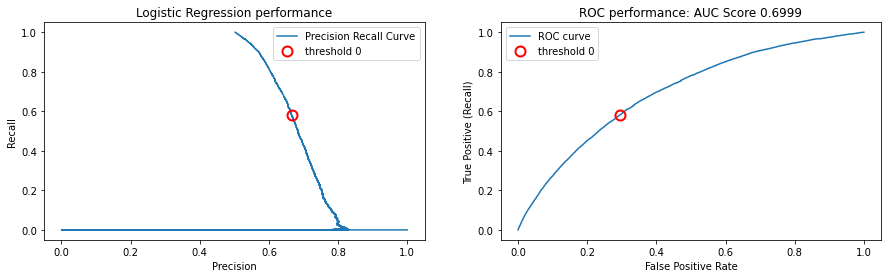

In [25]:
print(f"Dummy classifer score: {np.round(d_score, 4)}")
print(f"Accuracy using a Logistic Regression Classifier: {np.round(score, 4)}")
graphic()

In [26]:
print(f"Dummy classifier score: {np.round(d_score, 4)}")
print(f"Accuracy using a Logistic Regression Classifier: {np.round(score, 4)}")

Dummy classifier score: 0.5
Accuracy using a Logistic Regression Classifier: 0.6434


## SVM Classifier

In [27]:
# %%time
# d_score, score, graphic = M.SVM_classifier_assessment(X, y)

In [28]:
# print(f"Dummy classifer score: {np.rounc(d_score, 4)}")
# print(f"F1 Score using a SVM Classifier: {np.round(score, 4)}")

In [29]:
# graphic()

## RandomForest Classifier

In [30]:
%%time
d_score, score, comparison, graphic = M.RandomForest_classifier_assessment(X, y)

CPU times: user 51.1 s, sys: 0 ns, total: 51.1 s
Wall time: 51.1 s


In [31]:
print(f"Dummy classifer score: {np.round(d_score, 4)}")
print(f"Accuracy using a RandomForest Classifier: {np.round(score, 4)}")

Dummy classifer score: 0.5
Accuracy using a RandomForest Classifier: 0.6494


Dummy classifer score: 0.5
Accuracy using a RandomForest Classifier: 0.6494


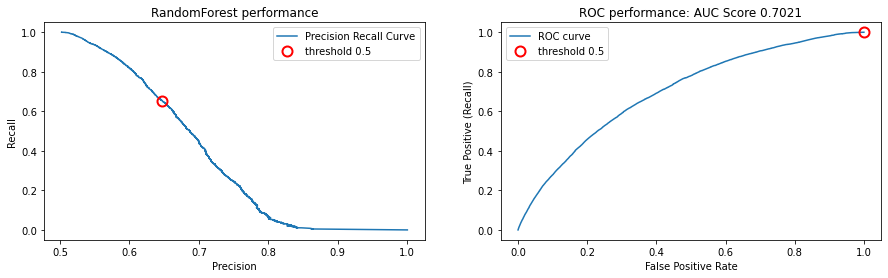

In [32]:
print(f"Dummy classifer score: {np.round(d_score, 4)}")
print(f"Accuracy using a RandomForest Classifier: {np.round(score, 4)}")
graphic()

In [33]:
comparison

,Estimator: 1,Estimator: 2,Estimator: 3,Estimator: 4,Estimator: 5
0,fk_grade,fk_grade,fk_grade,fk_grade,fk_grade
1,sentence_length,sentence_length,sentence_length,sentence_length,sentence_length
2,fk_ease,fk_ease,fk_ease,fk_ease,fk_ease
3,dale_chall_count,dale_chall_count,dale_chall_count,dale_chall_count,dale_chall_count
4,recognized,recognized,recognized,recognized,recognized
5,concreteness,perc_known,concreteness,concreteness,perc_known
6,perc_known,concreteness,perc_known,perc_known,concreteness
7,aoa,aoa,aoa,aoa,aoa


## NaiveBayes Classifier

In [34]:
%%time
d_score, score, graphic = M.NaiveBayes_classifier_assessment(X, y, priors=None)

Using prior probability: None
CPU times: user 358 ms, sys: 0 ns, total: 358 ms
Wall time: 357 ms


In [35]:
print(f"Dummy classifer score: {np.round(d_score, 4)}")
print(f"Accuracy using a NaiveBayes Classifier: {np.round(score, 4)}")

Dummy classifer score: 0.5
Accuracy using a NaiveBayes Classifier: 0.6168


Dummy classifer score: 0.5
Accuracy using a NaiveBayes Classifier: 0.6168


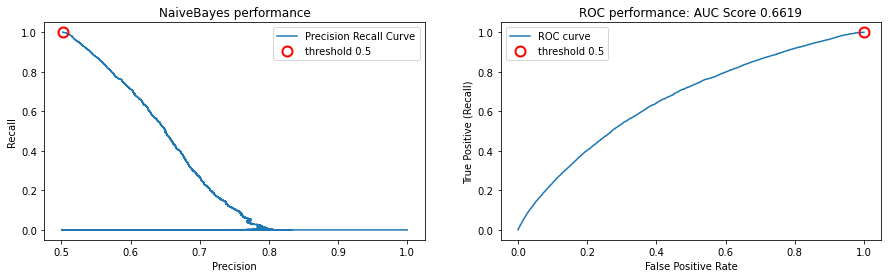

In [36]:
print(f"Dummy classifer score: {np.round(d_score, 4)}")
print(f"Accuracy using a NaiveBayes Classifier: {np.round(score, 4)}")
graphic()